# Anomaly Detection
# 1- Isolation Forest Anomaly Detection
# 2- DBSCAN Anomaly Detection
# 3- Local Outlier Factor Anomaly Detection

##1-Isolation Forest Anomaly Detection
##🔹 What is Isolation Forest?

Isolation Forest is an unsupervised anomaly detection algorithm that isolates anomalies instead of profiling normal data.

It was introduced in 2008 and is widely used because it is fast and scalable.

##🔹 How It Works

Builds multiple random decision trees.

Randomly selects a feature.

Randomly selects a split value.

Anomalies are isolated faster (fewer splits needed).

Shorter path length → higher anomaly score.

##🔹 Key Parameters

n_estimators → Number of trees

contamination → Expected proportion of anomalies

max_samples → Number of samples to train each tree

##🔹 Advantages

✅ Works well on large datasets
✅ No need for distance calculation
✅ Handles high-dimensional data

##🔹 Disadvantages

❌ Random nature may give slight variation
❌ Not ideal for very small datasets

##🔹 Best Used For

Fraud detection

Network intrusion

Manufacturing fault detection

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.ensemble import IsolationForest
out = IsolationForest(contamination=0.2)
out

IsolationForest(contamination=0.2)

In [4]:
pred = out.fit_predict(df)

In [5]:
index = np.where(pred < 0)
index

(array([  2,   4,   7,   8,   9,  12,  13,  15,  16,  22,  24,  28,  39,
         43,  45,  49,  53,  54,  56,  57,  58,  60,  67,  72,  75,  78,
         81,  86,  88,  99, 111, 120, 125, 129, 131, 153, 154, 155, 159,
        172, 177, 186, 187, 193, 206, 212, 215, 220, 221, 223, 228, 231,
        237, 243, 245, 247, 248, 254, 258, 259, 261, 266, 269, 270, 274,
        286, 294, 298, 300, 308, 319, 323, 330, 332, 335, 336, 349, 357,
        359, 360, 362, 370, 371, 375, 395, 408, 409, 412, 415, 426, 435,
        445, 453, 455, 456, 458, 459, 464, 468, 484, 486, 487, 489, 494,
        498, 502, 510, 518, 519, 522, 535, 537, 539, 542, 546, 549, 561,
        579, 580, 582, 584, 588, 589, 590, 595, 604, 606, 612, 618, 619,
        622, 645, 655, 657, 658, 660, 661, 662, 672, 673, 674, 684, 689,
        691, 695, 703, 706, 710, 715, 740, 744, 753, 759, 763]),)

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
x = df.values

In [9]:
x

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

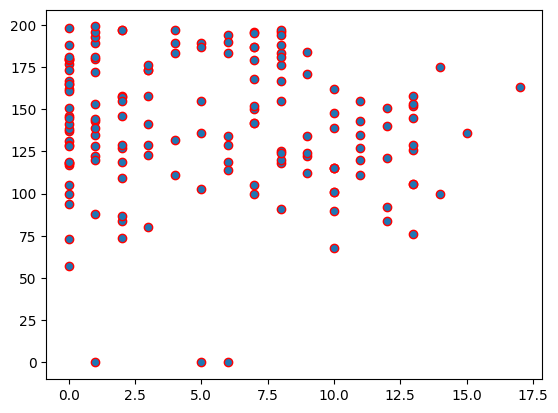

In [10]:
plt.scatter(x[index,0],x[index,1],edgecolors='r')

##2-DBSCAN Anomaly Detection
##🔹 What is DBSCAN?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm.

Points that do not belong to any cluster are considered anomalies (noise points).

##🔹 How It Works

It uses two parameters:

eps → Maximum distance between two points

min_samples → Minimum points to form a cluster

It classifies points into:

Core points

Border points

Noise points (anomalies)

##🔹 Key Idea

Low-density points = anomalies.

##🔹 Advantages

✅ Detects arbitrarily shaped clusters
✅ Automatically identifies noise
✅ No need to specify number of clusters

##🔹 Disadvantages

❌ Sensitive to eps value
❌ Not good for varying density datasets

##🔹 Best Used For

Spatial data

Geographic anomaly detection

Clustering-based anomaly detection

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

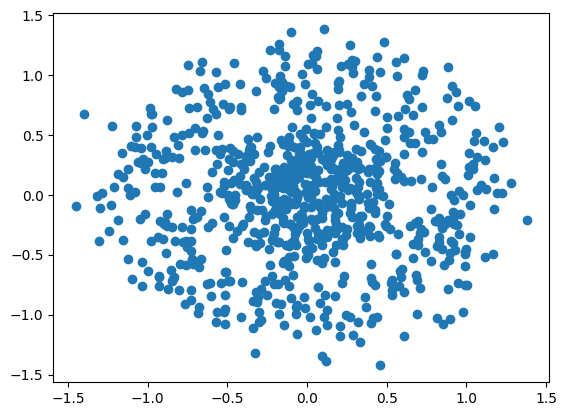

In [12]:
x,y = make_circles(n_samples=800,factor=0.3,noise=0.2)
plt.scatter(x[:,0],x[:,1])

In [13]:
dbscan = DBSCAN(eps=0.1)

In [14]:
dbscan.fit_predict(x)

array([17,  0,  1,  1,  1,  1, -1,  1,  1,  2,  1,  1,  3, -1, -1,  1,  1,
        1,  1,  4,  1,  4,  1,  3,  1, 14,  1,  1,  1,  3, -1,  1,  1,  1,
        1, -1, -1,  5, 10,  1,  1,  1,  1,  6,  7,  7,  5,  4,  1,  4, -1,
       -1,  8,  1,  1,  1,  1,  1, -1,  1,  1,  1,  0,  1,  4, -1, -1,  9,
        3,  4,  1,  1,  5,  7, -1,  9,  1, -1,  1,  7,  1,  1,  1, -1, -1,
        1, -1, 10, -1,  1, -1,  0,  1,  7, -1,  1, 10, -1,  1,  1,  1,  1,
        1,  1,  8, -1,  1,  1,  7, 11, -1, -1,  7,  1,  1, 18,  1,  4,  1,
       -1,  7,  1,  1, 12,  1,  1,  1,  1, -1,  1,  1, -1, -1, 17, -1,  4,
        1,  1,  9,  1,  2,  1, -1,  3, -1,  1,  3, -1,  4,  1, -1, -1,  1,
        1, -1,  7, 13,  1,  0, -1,  1, -1,  1,  9,  1,  1,  1,  1,  1,  1,
        0, -1,  1, -1,  1, 14,  6,  1,  1, -1,  4, 13,  4, -1,  1, 15,  1,
        1,  1,  1, -1,  0,  1,  1, -1,  1,  4, 15, 14, -1,  1,  1,  0,  1,
       11,  1,  1,  1, -1, -1,  1, -1, 16, -1,  1, 13,  0, -1,  1,  1, -1,
        3,  1,  1, -1,  6

In [15]:
dbscan.labels_

array([17,  0,  1,  1,  1,  1, -1,  1,  1,  2,  1,  1,  3, -1, -1,  1,  1,
        1,  1,  4,  1,  4,  1,  3,  1, 14,  1,  1,  1,  3, -1,  1,  1,  1,
        1, -1, -1,  5, 10,  1,  1,  1,  1,  6,  7,  7,  5,  4,  1,  4, -1,
       -1,  8,  1,  1,  1,  1,  1, -1,  1,  1,  1,  0,  1,  4, -1, -1,  9,
        3,  4,  1,  1,  5,  7, -1,  9,  1, -1,  1,  7,  1,  1,  1, -1, -1,
        1, -1, 10, -1,  1, -1,  0,  1,  7, -1,  1, 10, -1,  1,  1,  1,  1,
        1,  1,  8, -1,  1,  1,  7, 11, -1, -1,  7,  1,  1, 18,  1,  4,  1,
       -1,  7,  1,  1, 12,  1,  1,  1,  1, -1,  1,  1, -1, -1, 17, -1,  4,
        1,  1,  9,  1,  2,  1, -1,  3, -1,  1,  3, -1,  4,  1, -1, -1,  1,
        1, -1,  7, 13,  1,  0, -1,  1, -1,  1,  9,  1,  1,  1,  1,  1,  1,
        0, -1,  1, -1,  1, 14,  6,  1,  1, -1,  4, 13,  4, -1,  1, 15,  1,
        1,  1,  1, -1,  0,  1,  1, -1,  1,  4, 15, 14, -1,  1,  1,  0,  1,
       11,  1,  1,  1, -1, -1,  1, -1, 16, -1,  1, 13,  0, -1,  1,  1, -1,
        3,  1,  1, -1,  6

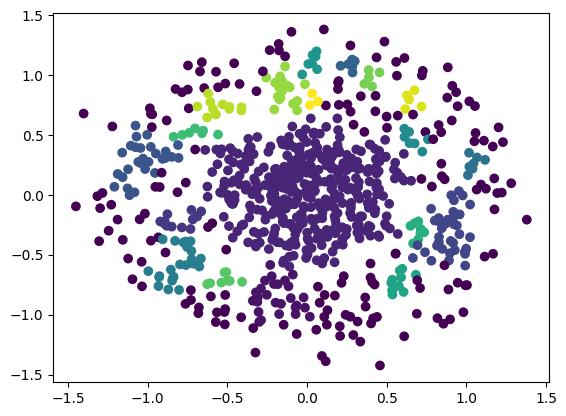

In [16]:
plt.scatter(x[:,0],x[:,1],c= dbscan.labels_)

##3️-Local Outlier Factor (LOF) Anomaly Detection
##🔹 What is LOF?

Local Outlier Factor is a density-based anomaly detection algorithm that compares the local density of a point with its neighbors.

##🔹 How It Works

Select number of neighbors (k).

Compute local density of each point.

Compare density with neighbors.

Lower density than neighbors → anomaly.

LOF Score:

≈ 1 → Normal

1 → Possible anomaly

1 → Strong anomaly

##🔹 Key Parameter

n_neighbors → Number of neighbors

##🔹 Advantages

✅ Detects local anomalies
✅ Good for datasets with varying density

##🔹 Disadvantages

❌ Computationally expensive
❌ Sensitive to k value

In [17]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=300,noise=0.1)

In [18]:
x

array([[-9.18174483e-01,  4.29041528e-01],
       [ 3.08525960e-01,  9.74914036e-01],
       [ 5.91809841e-02,  4.43809615e-01],
       [-4.31816435e-02,  1.00012339e+00],
       [ 7.07319131e-01, -4.86331209e-01],
       [-6.18176730e-02,  7.01923669e-02],
       [ 9.88301136e-01, -3.96079071e-01],
       [-3.70696747e-01,  9.94299403e-01],
       [ 2.75303406e-01,  9.06085171e-01],
       [ 1.89068789e+00,  3.12722996e-01],
       [ 4.72688768e-01, -3.86702233e-01],
       [ 2.32518393e-01,  8.84262960e-01],
       [ 1.94114641e+00, -4.01983589e-01],
       [ 5.43438072e-01, -2.64166894e-01],
       [ 1.59622180e-01,  7.77965428e-01],
       [-1.12220280e+00,  1.03001964e-01],
       [ 1.75111461e+00, -3.12588769e-01],
       [-1.73905773e-01,  1.09127905e+00],
       [-3.20441750e-01,  9.82096630e-01],
       [ 9.98545742e-01,  9.83604798e-02],
       [ 1.93397025e+00,  2.01058371e-01],
       [ 8.01093748e-01, -4.53742096e-01],
       [-5.14671534e-01,  8.02282264e-01],
       [ 4.

In [19]:
x_outliers = np.random.uniform(low=-3,high=3,size=(20,2))
x = np.vstack((x,x_outliers))

In [20]:
x

array([[-9.18174483e-01,  4.29041528e-01],
       [ 3.08525960e-01,  9.74914036e-01],
       [ 5.91809841e-02,  4.43809615e-01],
       [-4.31816435e-02,  1.00012339e+00],
       [ 7.07319131e-01, -4.86331209e-01],
       [-6.18176730e-02,  7.01923669e-02],
       [ 9.88301136e-01, -3.96079071e-01],
       [-3.70696747e-01,  9.94299403e-01],
       [ 2.75303406e-01,  9.06085171e-01],
       [ 1.89068789e+00,  3.12722996e-01],
       [ 4.72688768e-01, -3.86702233e-01],
       [ 2.32518393e-01,  8.84262960e-01],
       [ 1.94114641e+00, -4.01983589e-01],
       [ 5.43438072e-01, -2.64166894e-01],
       [ 1.59622180e-01,  7.77965428e-01],
       [-1.12220280e+00,  1.03001964e-01],
       [ 1.75111461e+00, -3.12588769e-01],
       [-1.73905773e-01,  1.09127905e+00],
       [-3.20441750e-01,  9.82096630e-01],
       [ 9.98545742e-01,  9.83604798e-02],
       [ 1.93397025e+00,  2.01058371e-01],
       [ 8.01093748e-01, -4.53742096e-01],
       [-5.14671534e-01,  8.02282264e-01],
       [ 4.

In [21]:
out = LocalOutlierFactor(n_neighbors=20,contamination=0.1)
out

LocalOutlierFactor(contamination=0.1)

In [22]:
y_pred = out.fit_predict(x)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [23]:
# Separate normal data points

x_inliers = x[y_pred==1]
x_outliers = x[y_pred==-1]


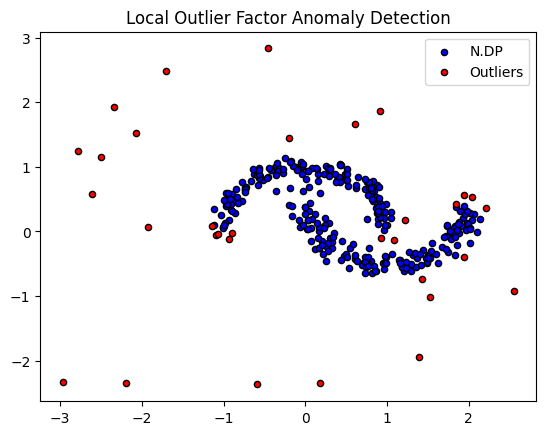

In [24]:
# Plot the graph

plt.title('Local Outlier Factor Anomaly Detection')
plt.scatter(x_inliers[:,0],x_inliers[:,1],c='b',s=20,edgecolor = 'k',label= 'N.DP')
plt.scatter(x_outliers[:,0],x_outliers[:,1],c='r',s=20,edgecolor='k',label='Outliers')
plt.legend()
plt.show()